### Importing Necessary Packages

In [3]:
# ! pip install gensim
# ! pip install spacy 
# ! pip install wordcloud
# ! pip install pyLDAvis
# ! pip install num2words

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from num2words import num2words
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint

In [6]:
#pickle
import pickle

In [7]:
#LdaVis
import pyLDAvis.gensim_models

In [8]:
#nltk
import nltk
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\scipy\io\matlab\mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tkaramyan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to

True

### Loading Fake_ Dataset

In [9]:
df = pd.read_csv('data/appartment_descriptions_eng.csv')

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Check for Na's

In [10]:
df.head()

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,addr,rooms,ruler,floor,price,descr,lat,lon
0,Mashtots avenue,2 room,50 m2,"floor 13/13 , new construction","Sale - 150,000 $",This 1 bedroom apartment occupying the last f...,40.185398,44.512001
1,Mashtots avenue,2 room,68 m2,floor 6/11,"Sale - 150,000 $","One - bedroom, one-bathroom apartment on Mash...",40.182201,44.507417
2,A. Isahakyan,4 room,180 m2,floor 4/4,"Sale - 380,000 $",Three - bedroom luxurious and spacious duplex...,40.188668,44.518887
3,A. Babajanyan,1 room,46 m2,floor 3/9,"Sale - 41,000 $","actual rooms: 2, wall building, needs renovat...",40.166719,44.440033
4,V.Papazyan,2 room,55 m2,floor 5/5,"Sale - 62,500 $","actual rooms: 3, stone building, renovated, r...",40.200245,44.504653


In [11]:
for i in df.columns:
    print(i,"--------->", df[i].nunique())

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


addr ---------> 409
rooms ---------> 9
ruler ---------> 199
floor ---------> 280
price ---------> 355
descr ---------> 1410
lat ---------> 1280
lon ---------> 1276


In [12]:
for col in df.columns:
    A = df.loc[:col].isnull().sum()
print(A)
print("Text length =", len(df.descr))

addr     0
rooms    0
ruler    0
floor    0
price    0
descr    0
lat      0
lon      0
dtype: int64
Text length = 1644


C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.dropna(thresh=3, inplace=True)
df.shape

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1644, 8)

In [14]:
df['num_rooms'] = df.rooms
df['num_floor'] = df.floor.apply(lambda x: x.replace('floor', ''))
df['num_price'] = df.price.apply(lambda x: x.replace(' ', ''))

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def replace_numbers_to_oridinals(text, category=None, wordify=True):
    if wordify:
        return re.sub(r"(\d+)", lambda x: num2words(x.group(0), category), text)
    return re.sub(r"(\d+)", "", text)

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
df.addr = df.addr.apply(lambda x: re.sub(r'[^\w]', ' ', x))
df.rooms = df.rooms.apply(lambda x: replace_numbers_to_oridinals(x))
df.ruler = df.ruler.apply(lambda x: replace_numbers_to_oridinals(x))
df.ruler = df.ruler.apply(lambda x: x.replace('mtwo','square metres'))
df.floor = df.floor.apply(lambda x: replace_numbers_to_oridinals(x, category='ordinal'))
df.floor = df.floor.apply(lambda x: x.replace(',', ' '))
df.price = df.price.apply(lambda x: x.replace(',', ''))
df.price = df.price.apply(lambda x: x.replace(' ', ''))
df.descr = df.descr.apply(lambda x: replace_numbers_to_oridinals(x, wordify=False))

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df.head()

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,addr,rooms,ruler,floor,price,descr,lat,lon,num_rooms,num_floor,num_price
0,Mashtots avenue,two room,fifty square metres,floor thirteenth/thirteenth new construction,Sale-150000$,This bedroom apartment occupying the last fl...,40.185398,44.512001,2 room,"13/13 , new construction","Sale-150,000$"
1,Mashtots avenue,two room,sixty-eight square metres,floor sixth/eleventh,Sale-150000$,"One - bedroom, one-bathroom apartment on Mash...",40.182201,44.507417,2 room,6/11,"Sale-150,000$"
2,A Isahakyan,four room,one hundred and eighty square metres,floor fourth/fourth,Sale-380000$,Three - bedroom luxurious and spacious duplex...,40.188668,44.518887,4 room,4/4,"Sale-380,000$"
3,A Babajanyan,one room,forty-six square metres,floor third/ninth,Sale-41000$,"actual rooms: , wall building, needs renovati...",40.166719,44.440033,1 room,3/9,"Sale-41,000$"
4,V Papazyan,two room,fifty-five square metres,floor fifth/fifth,Sale-62500$,"actual rooms: , stone building, renovated, re...",40.200245,44.504653,2 room,5/5,"Sale-62,500$"


### Preprocessing The Dataset

### NLTK Preprocessing

In [18]:
%%time
stemmer = SnowballStemmer('english') 
stops = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def stemming_(Sentence):
    cleaned_ver = [stemmer.stem(word) for word in word_tokenize(Sentence) if word not in stops and word.isalnum()]
    return ' '.join(cleaned_ver)

def lemmatize_(Sentence):
    cleaned_ver = [lemmatizer.lemmatize(word) for word in word_tokenize(Sentence) if word not in stops and word.isalnum()]
    return ' '.join(cleaned_ver)

Wall time: 12.4 ms


C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
%%time
df["stem_text"] = 0
df["lemm_text"] = 0

Wall time: 1.03 ms


C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
%%time
df.stem_text = df.descr.apply(lambda x: stemming_(x))
df.lemm_text = df.descr.apply(lambda y: lemmatize_(y))

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 5.29 s


In [21]:
df[["descr", "stem_text", "lemm_text"]].head()

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,descr,stem_text,lemm_text
0,This bedroom apartment occupying the last fl...,this bedroom apart occupi last floor stori bui...,This bedroom apartment occupying last floor st...
1,"One - bedroom, one-bathroom apartment on Mash...",one bedroom apart mashtot amiryan crossroad cu...,One bedroom apartment Mashtots Amiryan crossro...
2,Three - bedroom luxurious and spacious duplex...,three bedroom luxuri spacious duplex apart str...,Three bedroom luxurious spacious duplex apartm...
3,"actual rooms: , wall building, needs renovati...",actual room wall build need renov sunni oriel ...,actual room wall building need renovation sunn...
4,"actual rooms: , stone building, renovated, re...",actual room stone build renov renov roof sunni...,actual room stone building renovated renovated...


In [22]:
df['text'] = df.addr + " " + df.rooms + " " + df.ruler + " " + df.floor + " " + df.price + " " + df.lemm_text + " "

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df.text.values.tolist()[0]

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Mashtots avenue two room fifty square metres  floor thirteenth/thirteenth   new construction  Sale-150000$ This bedroom apartment occupying last floor story building located Mashtots Downtown Yerevan curretnly All utility available Additionally internet cable TV provided This home renovated never furnished never lived air conditioning installed Outdoor parking WhatsApp Telegram Grigor '

### WordCloud

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


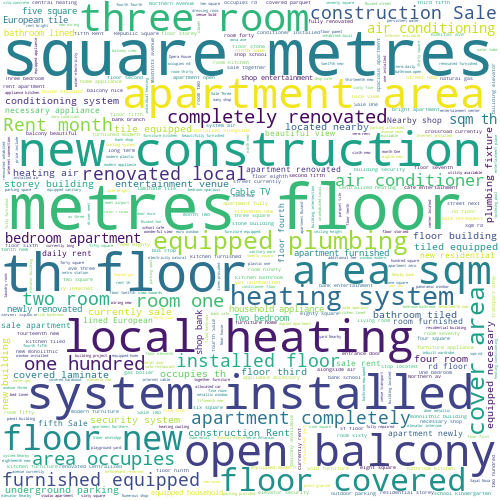

In [24]:
long_string2 = ','.join(list(df.text.values))
wordcloud = WordCloud(background_color = "white", width = 500, height = 500, max_words = 5000, contour_width = 20)
wordcloud.generate(long_string2)
wordcloud.to_image()

### Unigram and Trigram: 

In [25]:
def plot_15_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
Unigram_vectorizer = CountVectorizer()
Trigram_vectorizer = CountVectorizer(ngram_range = (3, 3),
                                     token_pattern = r'\b\w+\b',
                                     min_df=1)

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
%%time
Unigram_data = Unigram_vectorizer.fit_transform(df.text)
Trigram_data = Trigram_vectorizer.fit_transform(df.text)

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 200 ms


## CountVectorizer - How it works

In [28]:
Unigram_vectorizer.get_feature_names()[::100]

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['10',
 '160000',
 '300000',
 '535000',
 '84000',
 'aleq',
 'attractive',
 'brand',
 'cleanliness',
 'covered',
 'duly',
 'facing',
 'germany',
 'image',
 'kochar',
 'malayan',
 'narekatsi',
 'painted',
 'production',
 'rise',
 'sixteen',
 'sun',
 'travertine',
 'wash']

In [29]:
total = np.zeros(len(Unigram_vectorizer.get_feature_names()))
print(total, len(total))
for t in Unigram_data:
#     print(t)
#     print(len(t.toarray()[0]))
    total += t.toarray()[0]
print(total, len(total))

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0. 0. 0. ... 0. 0. 0.] 2366
[13. 36. 16. ...  2.  1.  1.] 2366


C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


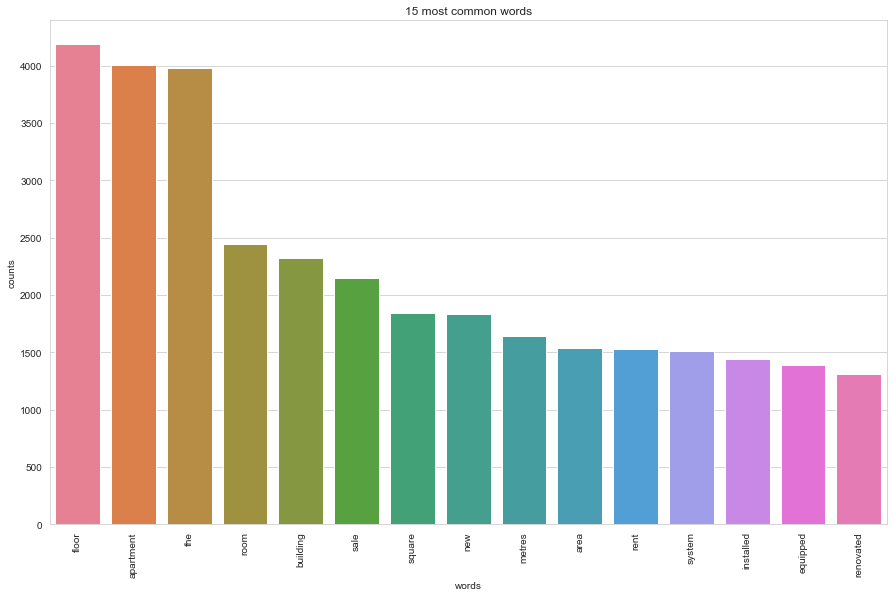

Wall time: 395 ms


In [30]:
%%time
plot_15_most_common_words(Unigram_data, Unigram_vectorizer)

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


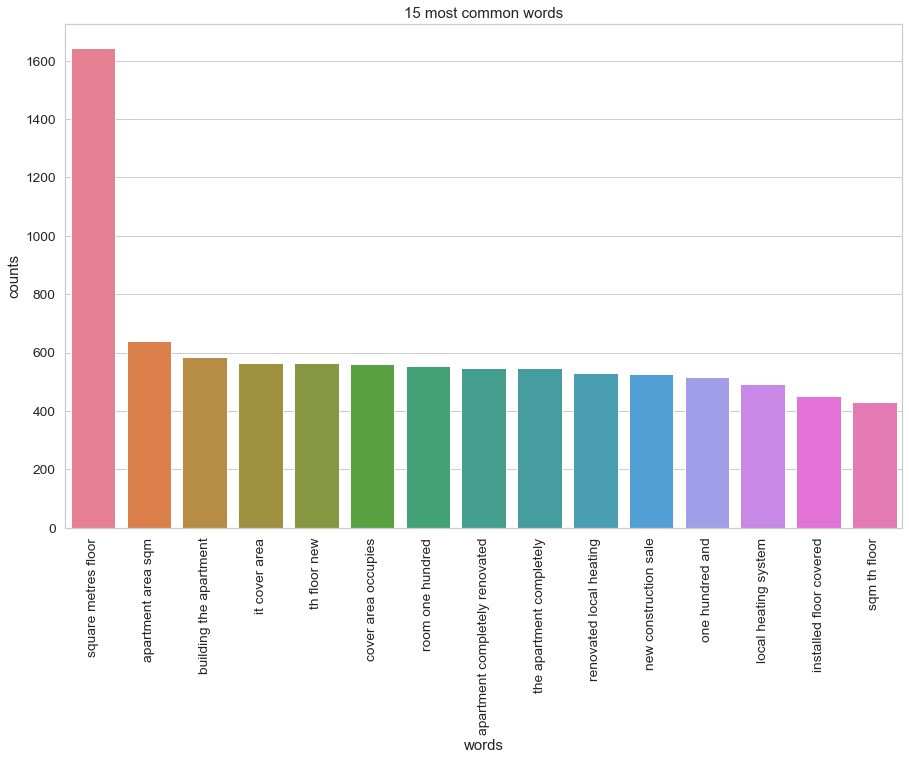

Wall time: 329 ms


In [31]:
%%time
plot_15_most_common_words(Trigram_data, Trigram_vectorizer)

### TF-IDF on Trigram

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


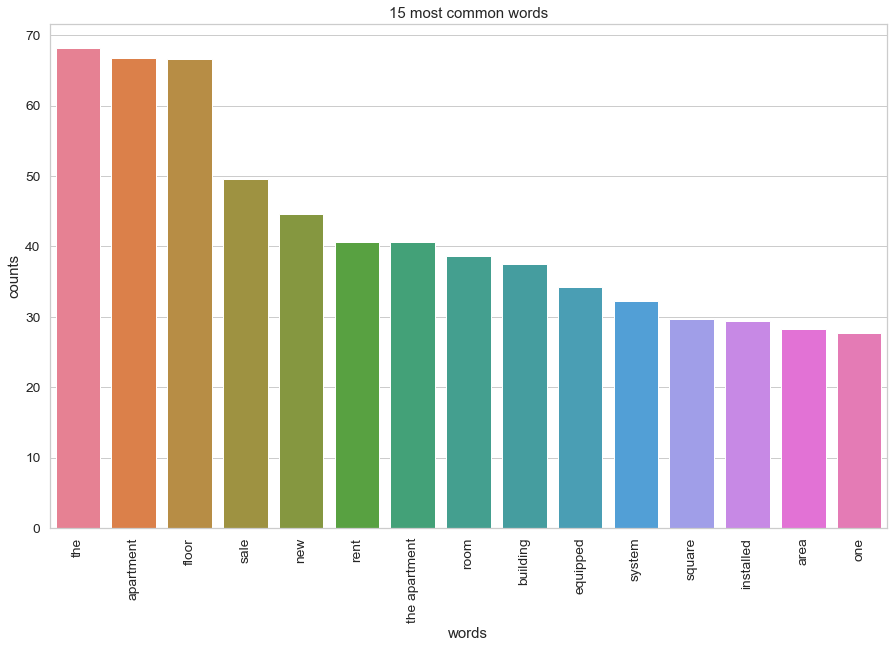

Wall time: 572 ms


In [32]:
%%time
TF_Vectorizer = TfidfVectorizer(ngram_range = (1, 3),
                                    token_pattern = r'\b\w+\b', min_df=1)
Data = TF_Vectorizer.fit_transform(df.text)
plot_15_most_common_words(Data, TF_Vectorizer)

In [33]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def print_topics(model, count_vectorizer, n_top_words):
    
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [35]:
number_topics = 3
number_words = 4

lda = LDA(number_topics, n_jobs = None)
lda.fit(Data)

print("Topics found via LDA:")
print_topics(lda, TF_Vectorizer, number_words)

Topics found via LDA:

Topic #0:
myasnikyan residential complex hasratyan mkrtchyan

Topic #1:
the floor apartment sale

Topic #2:
apartment floor the new


### More Detailed LDA 

In [183]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    count=0
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus,
                                                num_topics = num_topics,
                                                id2word=dictionary,
                                                passes=10,
#                                                 alpha='auto',
#                                                 update_every=0,
#                                                 minimum_probability=0.6,
                                                random_state=76)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text_data, dictionary=dictionary, corpus=corpus, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        count+=1
        print(f"Model {count} is built!")

    return model_list, coherence_values

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

This is used as the input by the LDA model.

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

### How to find the optimal number of topics for LDA?

The overall coherence score of a topic is the average of the distances between words.

0.3 is bad

0.4 is low (probably have the wrong number of topics )

0.55 is okay

0.65 might be as good as it is going to get

0.7 is nice

0.8 is unlikely and

0.9 is probably wrong

How to interpret this?

Topic 0 is a represented as '0.014*"The" + 0.014*"said" + 0.006*"police" + 0.006*"law" + 0.005*"case"')

The weights reflect how important a keyword is to that topic.

Looking at these keywords, can you guess what this topic could be?

So how to infer pyLDAvis’s output?

* Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

* A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

* A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

* Salient keywords form the selected topic.


### Topic Modeling with POS tagging

In [184]:
def retrive_needed_words(text):
    is_noun_adj = lambda pos: pos[:2] in ['NN', 'JJ', 'VB', 'RB']
#                                           [ 'JJR', 'JJS', 'VBD', 'VBG','VBN', 'VBP', 'VBZ', 'NNP', 'NNPS', 'NNS',  'RBR', 'RBS']
    tokenized = word_tokenize(text)
    nouns_adj = [word.lower() for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [185]:
simplified_text_data = list()
for text in df.text:
    simplified_text = retrive_needed_words(text)
    simplified_text_data.append(simplified_text)
    print("Normal text: ", text, '\nSimplified text: ', simplified_text)
    print()

Normal text:  Mashtots avenue two room fifty square metres  floor thirteenth/thirteenth   new construction  Sale-150000$ This bedroom apartment occupying last floor story building located Mashtots Downtown Yerevan curretnly All utility available Additionally internet cable TV provided This home renovated never furnished never lived air conditioning installed Outdoor parking WhatsApp Telegram Grigor  
Simplified text:  mashtots avenue room fifty square metres floor thirteenth/thirteenth new construction sale-150000 bedroom apartment occupying last floor story building located mashtots downtown yerevan curretnly all utility available additionally internet cable tv provided home renovated never furnished never lived air conditioning installed outdoor parking whatsapp telegram grigor

Normal text:  Mashtots avenue two room sixty-eight square metres  floor sixth/eleventh  Sale-150000$ One bedroom apartment Mashtots Amiryan crossroad currently sale long term rent It cover area occupies th fl

Normal text:  Northern av  three room one hundred and seventy square metres  floor fourth/fifth  Sale-350000$ duplex area rent th th floor storey stone building Located Teryan Street near Paulaner Beerhouse The apartment fully repaired populated unique design The entrance door metallic window modern plastic one installed air conditioner floor covered laminate Provided constant water gas Heated gas boiler The kitchen bathroom tiled european production tile equipped sanitary ware There bathroom apartment All room furnished Cable TV internet connection available There hallway kitchen If needed provide driver meet airport bring beforehand reserved address Short term Viber WhatsApp Arthur  
Simplified text:  northern av room seventy square metres floor fourth/fifth sale-350000 duplex area rent th th floor storey stone building located teryan street paulaner beerhouse apartment fully repaired populated unique design entrance door metallic window modern plastic installed air conditioner floor

Normal text:  Tigran Mets ave  three room eighty-five square metres  floor second/fifth  Sale-105000$ Two bedroom apartment Tigran Mets avenue currently sale It cover area occupies nd floor building The apartment newly renovated The height ceiling The apartment sale together kitchen furniture All necessary shop bus stop located nearby  
Simplified text:  tigran mets ave room eighty-five square metres floor second/fifth bedroom apartment tigran mets avenue currently sale cover area occupies nd floor building apartment newly renovated height ceiling apartment sale together kitchen furniture all necessary shop bus stop located nearby

Normal text:  Erebuni two room sixty-three square metres  floor fourth/fourth  Sale-61000$ For sale apartment area sqm th floor stone building project near intersection Muratsan Erebuni street The apartment fully renovated floor covered parquet two balcony open closed different view Nearby shopping center Erebuni ID Bank polyclinic  
Simplified text:  erebun

Normal text:  Vratsakan str  4 two room sixty square metres  floor fourth/fifth  Sale-65000$ One bedroom apartment Zaryan Vratsakan crossroad next Gold Gym currently sale It cover area occupies th floor building The apartment newly renovated It beautiful view city enclosed balcony basement area The building yard playground football field  
Simplified text:  vratsakan str room sixty square metres floor fourth/fifth sale-65000 bedroom apartment zaryan vratsakan crossroad next gold gym currently sale cover area occupies th floor building apartment newly renovated beautiful view city enclosed balcony basement area building yard playground football field

Normal text:  Gyulbenkyan 36 two room fifty-seven square metres  floor third/fifth  Sale-84000$ One bedroom apartment Komitas Gyulbenkyan crossroad next HSBC Bank currently sale rent It cover area occupies rd floor building The apartment newly renovated Local heating conditioning system installed Kitchen bathroom equipped necessary applian

Normal text:  Nalbandyan three room one hundred and thirty square metres  floor fifth/sixth  Sale-onrequest Two bedroom apartment Nalbandyan street near Republic Square currently sale It cover area occupies th floor storey building The apartment renovated Local heating system heating floor air ventilation system installed All room furnished The apartment open balcony laundry room Open air parking allocated car  
Simplified text:  nalbandyan room thirty square metres floor fifth/sixth sale-onrequest bedroom apartment nalbandyan street republic square currently sale cover area occupies th floor storey building apartment renovated local heating system heating floor air ventilation system installed room furnished apartment open balcony laundry room open air parking allocated car

Normal text:  Northern av  5 five room three hundred and ten square metres  floor tenth/tenth   new construction  Sale-1550000$ bedroom apartment Northern Avenue currently sale It cover area occupies th floor new 

Normal text:  Lvovyan three room seventy-three square metres  floor third/sixth   new construction  Sale-84000$ From developer For sale apartment area sqm rd floor building construction st Nork massif Lvovyan Street new residential complex Yerevan View The apartment put operation zero condition plastered dividing wall installed window entrance door laid electrical wire pipe According plan apartment consists living room kitchen bedroom bathroom open balcony The building built according modern technology form monolithic reinforced concrete structure seismic resistance point The ceiling height Sound insulation thermal insulation technology used exterior wall It planned install European elevator underground parking recreation area playground The complex located quiet ecologically clean green area overlooking Mount Aragats water park The building apartment ranging sqm Prices apartment USD per sqm depending location parking space underground parking USD st floor nd floor When buying apartmen

Normal text:  Mashtots avenue three room ninety-five square metres  floor fourth/fourth  Sale-210000$ Two bedroom apartment Mashtots Pushkin avenue currently sale It cover area occupies th floor storey building The apartment need renovation Both open close balcony available The building historical cultural value  
Simplified text:  mashtots avenue room ninety-five square metres floor fourth/fourth bedroom apartment mashtots pushkin avenue currently sale cover area occupies th floor storey building apartment need renovation both open close balcony available building historical cultural value

Normal text:  M  Baghramyan ave  three room ninety-three square metres  floor fourth/fourth  Sale-120000$ Two bedroom apartment st lane Proshyan Baghramyan crossroad currently sale It cover area occupies th floor building An air conditioner installed alongside water heater Post office bank branch metro station Baghramyan bus stop located nearby  
Simplified text:  m baghramyan ave room ninety-three

Normal text:  Shiraz four room one hundred and eighteen square metres  floor first/fourteenth  Sale-62000$ For sale spacious apartment area sqm st floor building Shiraz Street near Yerevan City supermarket The main part apartment completely renovated local heating system installed floor covered parquet laminate kitchen bathroom tiled equipped plumbing fixture There spacious corner balcony The room kitchen furnished equipped household appliance There many shop school kindergarten transport stop various entertainment venue nearby  
Simplified text:  shiraz room eighteen square metres floor first/fourteenth sale-62000 sale spacious apartment area sqm st floor building shiraz street yerevan city supermarket main part apartment completely renovated local heating system installed floor covered parquet laminate kitchen bathroom tiled equipped plumbing fixture spacious corner balcony room kitchen furnished equipped household appliance many shop school kindergarten transport stop various entert

Normal text:  Aygedzor three room one hundred and ten square metres  floor fourth/eighth   new construction  Sale-185000$ Two bedroom spacious apartment Aygedzor street currently sale It cover area occupies th floor new residential storey building The apartment renovated according latest European standard Local heating system air conditioner installed All room furnished equipped necessary appliance The apartment full inbuilt wardrobe  
Simplified text:  aygedzor room ten square metres floor fourth/eighth new construction sale-185000 bedroom spacious apartment aygedzor street currently sale cover area occupies th floor new residential storey building apartment renovated according latest european standard local heating system air conditioner installed room furnished equipped necessary appliance apartment full inbuilt wardrobe

Normal text:  Khanjyan four room one hundred and seventy-five square metres  floor tenth/fourteenth   new construction  Sale-280000$ Three bedroom spacious sunny a

Normal text:  Aghbyur Serob 50 three room eighty-eight square metres  floor fourth/seventh   new construction  Sale-onrequest From developer For sale apartment area sqm th floor building construction company Technotun Agpur Serob street near Verin Antarain Street Saralanj highway within walking distance Rio shopping center Cascade It consists living room bedroom kitchen bathroom open balcony The monolithic concrete building designed according latest European safety standard sound insulation thermal insulation consists residential floor elevator installed parking lot commercial premise nearby This modern building received symbolic name Technohouse architectural technical solution In slender modern building apartment premise new way life new culture life city The building entrance Compact apartment st nd bedroom planned st floor spacious apartment bedroom flexible layout taking account wish customer spacious balcony planned nd th floor luxury penthouse spacious terrace planned th floor A

Normal text:  Komitas ave  17 three room seventy-eight square metres  floor third/fifth  Sale-110000$ apartment area rent sale nd floor storied residential building Komitas avenue The apartment fully repaired The entrance door metallic window modern plastic one installed air conditioner floor wooden Water gas hour apartment heating gas boiler The kitchen bathroom tiled equipped sanitary ware There wardrobe cupboard kitchen hallway All necessary shop nearby  
Simplified text:  komitas ave room seventy-eight square metres floor third/fifth sale-110000 apartment area rent sale nd floor storied residential building komitas avenue apartment fully repaired entrance door metallic window modern plastic installed air conditioner floor wooden water gas hour apartment heating gas boiler kitchen bathroom tiled equipped sanitary ware wardrobe cupboard kitchen hallway necessary shop nearby

Normal text:  Komitas ave  three room eighty square metres  floor fifth/ninth   new construction  Sale-onreque

Normal text:  Tsarav Aghbyur four room one hundred and eighteen square metres  floor seventh/fourteenth   new construction  Sale-180000$ For sale apartment area sqm th floor monolithic building Tsarav Agpur street The apartment completely renovated floor covered German laminate thermal insulation press granite local heating air conditioning system installed The ceiling height basement shelf sqm closet Both bathroom kitchen lined European tile equipped plumbing fixture One bedroom connected bathroom dressing room There open balcony beautiful view The apartment provided modern furniture household appliance The house elevator intercom On ground floor child development center barber shop cafe There parking lot building buy place additional fee The yard well maintained playground Nearby beautiful park fountain sport school skating rink prosthetics center school kindergarten shop bank entertainment venue Sold furniture appliance  
Simplified text:  tsarav aghbyur room eighteen square metres 

Normal text:  Teryan 8 two room thirty-eight square metres  floor eighth/tenth   new construction  Sale-130000$ For sale bright apartment area sqm th floor building Teryan Street The apartment completely renovated local heating system panoramic window installed floor covered laminate tile The bathroom lined European tile equipped plumbing The bedroom dressing room The apartment furnished equipped modern appliance accessory There French balcony beautiful view There elevator building Nearby park bank school shop cafe entertainment venue Sold furniture appliance  
Simplified text:  teryan room thirty-eight square metres floor eighth/tenth new construction sale-130000 sale bright apartment area sqm th floor building teryan street apartment completely renovated local heating system panoramic window installed floor covered laminate bathroom lined european tile equipped plumbing bedroom dressing room apartment furnished equipped modern appliance accessory french balcony beautiful view elevato

Normal text:  Vardanants three room seventy-eight square metres  floor ninth/eleventh  Sale-105000$ For sale daily rent apartment sqm th floor building intersection Vardanants Alek Manukyan street The apartment completely renovated local heating air conditioning system installed floor covered laminate Both bathroom lined European tile The apartment furnished equipped modern appliance accessory closet The house elevator intercom Nearby shop Ring park bank school cafe entertainment venue Sold furniture appliance  
Simplified text:  vardanants room seventy-eight square metres floor ninth/eleventh sale-105000 sale daily rent apartment sqm th floor building intersection vardanants alek manukyan street apartment completely renovated local heating air conditioning system installed floor covered laminate bathroom lined european apartment furnished equipped modern appliance accessory closet house elevator intercom nearby shop ring park bank school cafe entertainment venue sold furniture applian

Normal text:  E Hasratyan 80 three room sixty-seven square metres  floor third/fifth   new construction  Sale-70000$ For sale apartment area sqm rd floor new building construction Hasratyan Street On st floor building commercial area apartment located nd floor On roof building landscaped area recreation entertainment playground The renovation apartment continues The apartment put operation major repair cost included price All necessary document transaction ready We offer apartment area starting sqm Apartments purchased mortgage  
Simplified text:  e hasratyan room sixty-seven square metres floor third/fifth new construction sale-70000 sale apartment area sqm rd floor new building construction hasratyan street st floor building commercial area apartment located nd floor roof building landscaped area recreation entertainment renovation apartment continues apartment put operation major repair cost included price all necessary document transaction ready offer apartment area starting sqm ap

Normal text:  Sayat Nova ave  three room ninety-three square metres  floor twelfth/twenty-second   new construction  Sale-245000$ For sale apartment area sqm th floor elite new building intersection Avenue Abovyan Street The apartment completely renovated connected central heating cooling system floor covered laminate tile Both bathroom lined European tile equipped plumbing The apartment furnished equipped modern household appliance The building elevator security system Nearby shop bank school cafe entertainment venue  
Simplified text:  sayat nova ave room ninety-three square metres floor twelfth/twenty-second new construction sale-245000 sale apartment area sqm th floor elite new building intersection avenue abovyan street apartment completely renovated connected central heating cooling system floor covered laminate bathroom lined european tile equipped plumbing apartment furnished equipped modern household appliance building elevator security system nearby shop bank school cafe ente

Normal text:  Hr  Kochar 147 1 three room one hundred and fifteen square metres  floor eighth/eleventh   new construction  Sale-240000$ Two bedroom apartment Riga Hr Kochar crossroad currently long term rent It cover area occupies th floor new residential storey building The apartment renovated Local heating system air conditioner installed One bedroom closet Underground parking allocated car The building service fee AMD School N RIO mall numerous shop located nearby  
Simplified text:  hr kochar room fifteen square metres floor eighth/eleventh new construction sale-240000 bedroom apartment riga hr kochar crossroad currently long term rent cover area occupies th floor new residential storey building apartment renovated local heating system air conditioner installed bedroom closet underground parking allocated car building service fee amd school n rio mall numerous shop located nearby

Normal text:  Mamikonyants 38  apt  39 one room forty square metres  floor third/sixth  Sale-55000$ Th

Normal text:  M Saryan 26  apt  10 four room ninety-six square metres  floor fifth/ninth  Rent-800$/month Large comfortable apartment lovely open balcony fully fitted open kitchen spase rent th floor storied building close crossing Amiryan str All utility gas central heating availabel flat convininet layout Current price includes home applaiences furniture Nearby school kindergarten supermarket lovely park several store  
Simplified text:  m saryan apt room ninety-six square metres floor fifth/ninth rent-800 /month large comfortable apartment lovely open balcony fully fitted open kitchen spase rent th floor storied building close crossing amiryan str all utility gas central heating availabel flat convininet layout current price includes home applaiences furniture nearby school kindergarten supermarket lovely park several store

Normal text:  Hin Erevantsi 2  apt  94 three room seventy-five square metres  floor ninth/eleventh   new construction  Rent-650$/month apartment rent th floor n

Normal text:  Northern av  three room one hundred and seventy square metres  floor fourth/fifth  Sale-350000$ duplex area rent th th floor storey stone building Located Teryan Street near Paulaner Beerhouse The apartment fully repaired populated unique design The entrance door metallic window modern plastic one installed air conditioner floor covered laminate Provided constant water gas Heated gas boiler The kitchen bathroom tiled european production tile equipped sanitary ware There bathroom apartment All room furnished Cable TV internet connection available There hallway kitchen If needed provide driver meet airport bring beforehand reserved address Short term Viber WhatsApp Arthur  
Simplified text:  northern av room seventy square metres floor fourth/fifth sale-350000 duplex area rent th th floor storey stone building located teryan street paulaner beerhouse apartment fully repaired populated unique design entrance door metallic window modern plastic installed air conditioner floor

Normal text:  Tamanyan three room eighty-five square metres  floor fourth/sixth  Rent-700$/month Two bedroom apartment Tamanyan street near Cascade currently rent It cover area occupies th floor storey building The apartment renovated All room furnished equipped necessary appliance Local heating system air conditioner installed The rent price depends length stay  
Simplified text:  tamanyan room eighty-five square metres floor fourth/sixth rent-700 bedroom apartment tamanyan street cascade currently rent cover area occupies th floor storey building apartment renovated room furnished equipped necessary appliance local heating system air conditioner installed rent price depends length stay

Normal text:  Buzand 87 three room ninety-five square metres  floor ninth/fourteenth   new construction  Rent-1400$/month Two bedroom apartment Buzand street currently rent It cover area occupies th floor building The apartment newly renovated Local heating system installed alongside air conditioner o

Normal text:  Buzand 87 three room ninety-five square metres  floor ninth/fourteenth   new construction  Rent-1400$/month Two bedroom apartment Buzand street currently rent It cover area occupies th floor building The apartment newly renovated Local heating system installed alongside air conditioner open balcony available Park New Yerevan bank branch bus stop located nearby  
Simplified text:  buzand room ninety-five square metres floor ninth/fourteenth new construction rent-1400 bedroom apartment buzand street currently rent cover area occupies th floor building apartment newly renovated local heating system installed alongside air conditioner open balcony available park new yerevan bank branch bus stop located nearby

Normal text:  Northern av  three room one hundred and forty square metres  floor fifth/eighth   new construction  Rent-2300$/month For rent apartment area sqm th floor new building Severny Prospekt near Opera House The apartment completely renovated The heating cooling 

Normal text:  Teryan 8 two room fifty-seven square metres  floor first/fourth  Rent-950$/month For rent daily long time а bright apartment area sqm st floor new building Teryan Street protruding beyond partially separate building separate entrance The apartment completely renovated local heating air conditioning system installed floor covered press granite heating The bathroom tiled equipped plumbing fixture The apartment furnished equipped appliance There open balcony A video surveillance system installed floor rent per month daily rent  
Simplified text:  teryan room fifty-seven square metres floor first/fourth rent-950 /month rent daily long time а bright apartment area sqm st floor new building teryan street protruding partially separate building separate entrance apartment completely renovated local heating air conditioning system installed floor covered press granite heating bathroom tiled equipped plumbing fixture apartment furnished equipped appliance open balcony a video surve

Normal text:  Northern av  three room one hundred and eighty square metres  floor fourteenth/sixteenth   new construction  Rent-2800$/month Two bedroom spacious apartment downtown Northern avenue near Opera Swan Lake currently rent It cover area occupies th floor new residential storey building The apartment renovated according latest European standard Centralized heating conditioning system installed All room furnished equipped necessary appliance Inbuilt wardrobe available The apartment laundry room open balcony amazing view towards different part city There jacuzzi installed one bedroom allows enjoy amazing city view Underground parking allocated car  
Simplified text:  northern av room eighty square metres floor fourteenth/sixteenth new construction rent-2800 bedroom spacious apartment downtown northern avenue opera swan lake currently rent cover area occupies th floor new residential storey building apartment renovated according latest european standard centralized heating conditi

Normal text:  Mashtots avenue three room one hundred and twenty square metres  floor third/fifth  Rent-800$/month For daily rent bright spacious apartment area sqm rd floor stone building project intersection Mashtots Avenue Pushkin Street The apartment completely renovated local heating air conditioning system installed floor covered parquet tile bathroom kitchen tiled equipped plumbing The room kitchen comfortably furnished equipped household appliance accessory There open balcony view avenue Entertainment venue bank shop located nearby  
Simplified text:  mashtots avenue room square metres floor third/fifth rent-800 daily rent bright spacious apartment area sqm rd floor stone building project intersection mashtots avenue pushkin street apartment completely renovated local heating air conditioning system installed floor covered parquet tile bathroom kitchen tiled equipped plumbing room kitchen comfortably furnished equipped household appliance accessory open balcony view avenue enter

Normal text:  Komitas ave  four room one hundred and fifty-six square metres  floor eleventh/fifteenth   new construction  Rent-2300$/month For rent apartment area sqm th floor new monolithic building Komitas Avenue The apartment completely renovated local heating system installed floor covered laminate tile bathroom tiled equipped plumbing fixture There open balcony The room kitchen comfortably furnished equipped household appliance The house elevator security system There underground parking Nearby shop bank entertainment venue transport stop The apartment also suitable office  
Simplified text:  komitas ave room fifty-six square metres floor eleventh/fifteenth new construction rent-2300 rent apartment area sqm th floor new monolithic building komitas avenue apartment completely renovated local heating system installed floor covered laminate tile bathroom tiled equipped plumbing fixture open balcony room kitchen comfortably furnished equipped household appliance house elevator securi

Normal text:  Komitas ave  three room sixty-five square metres  floor ninth/eighteenth   new construction  Rent-600$/month For rent apartment area sqm th floor new monolithic building intersection Komitas Avenue Vagharshyan Street The apartment completely renovated furnished modern style equipped necessary appliance accessory Local heating air conditioning system installed floor covered laminate tile The bathroom lined European tile equipped plumbing fixture There open balcony The house elevator security system Nearby bank shop cafe transport stop  
Simplified text:  komitas ave room sixty-five square metres floor ninth/eighteenth new construction rent-600 rent apartment area sqm th floor new monolithic building intersection komitas avenue vagharshyan street apartment completely renovated furnished modern style equipped necessary appliance accessory local heating air conditioning system installed floor covered laminate bathroom lined european tile equipped plumbing fixture open balcony

Normal text:  Tamanyan three room ninety-seven square metres  floor third/fifth  Rent-1100$/month For rent apartment area sqm rd floor stone building project Tamanyan Street next Cascade The apartment completely renovated local heating air conditioning system installed floor covered hardwood tile Both bathroom lined European tile equipped plumbing one bathroom connected bedroom jacuzzi The apartment furnished equipped modern appliance accessory closet storage room Nearby park shop bank cafe entertainment venue  
Simplified text:  tamanyan room ninety-seven square metres floor third/fifth rent-1100 rent apartment area sqm rd floor stone building project tamanyan street next cascade apartment completely renovated local heating air conditioning system installed floor covered hardwood bathroom lined european tile equipped plumbing bathroom connected bedroom jacuzzi apartment furnished equipped modern appliance accessory closet storage room nearby park shop bank cafe entertainment venue

No

Normal text:  Vardanants 14 three room seventy-nine square metres  floor fifth/sixth  Shortterm-14000Դ/day For rent apartment area sqm th floor stone building Vardanants Street near Vernissage Republic Square The apartment completely renovated local heating air conditioning system installed floor covered press granite bathroom tiled equipped plumbing Jacuzzi installed All room comfortably furnished equipped household appliance accessory There Internet cable TV There open balcony The house elevator Nearby shop bank branch park entertainment venue  
Simplified text:  vardanants room seventy-nine square metres floor fifth/sixth shortterm-14000դ/day rent apartment area sqm th floor stone building vardanants street vernissage republic square apartment completely renovated local heating air conditioning system installed floor covered press granite bathroom tiled equipped plumbing jacuzzi installed room comfortably furnished equipped household appliance accessory internet cable tv open balcon

Normal text:  Amiryan 4 4 two room fifty-four square metres  floor fourth/eleventh   new construction  Rent-750$/month For daily rent bright apartment area sqm th floor new monolithic building Amiryan Street The apartment completely renovated inhabited local heating air conditioning system installed floor covered laminate tile The bathroom lined European tile equipped plumbing The apartment equipped amenity furnished equipped modern appliance accessory From apartment exit roof hotel used terrace The building elevator Nearby Republic Square shop bank entertainment venue  
Simplified text:  room fifty-four square metres floor fourth/eleventh new construction rent-750 daily rent bright apartment area sqm th floor new monolithic building amiryan street apartment completely renovated inhabited local heating air conditioning system installed floor covered laminate bathroom lined european tile equipped plumbing apartment equipped amenity furnished equipped modern appliance accessory from apar

Normal text:  Davtashen 2 nd distr  three room seventy-five square metres  floor seventh/fourteenth   new construction  Sale-97000$ For sale а comfortable apartment area sqm th floor new building Davtashen near park The apartment completely renovated local heating air conditioning system installed floor covered laminate The bathroom lined tile equipped plumbing fixture The apartment furnished equipped necessary appliance accessory Nearby park Yerevan City supermarket shop place recreation entertainment Sold furniture appliance  
Simplified text:  davtashen nd distr room seventy-five square metres floor seventh/fourteenth new construction sale-97000 sale а comfortable apartment area sqm th floor new building davtashen park apartment completely renovated local heating air conditioning system installed floor covered laminate bathroom lined tile equipped plumbing fixture apartment furnished equipped necessary appliance accessory nearby park yerevan city supermarket shop place recreation en

Normal text:  Tumanyan St  four room two hundred square metres  floor third/fourth  Sale-260000$ A newly renovated luxurious spacious duplex apartment total currently rent It located Nalbandyan crossroad It occupies rd th additional floor storey building All room uniquely designed furnished A local heating system installed All necessary home appliance available Air conditioning installed Bedrooms open balcony Numerous shop entertainment center supermarket bank easily found right around location  
Simplified text:  tumanyan st room hundred square metres floor sale-260000 a newly renovated luxurious spacious duplex apartment total currently rent located nalbandyan crossroad occupies rd th additional floor storey building all room uniquely designed furnished local heating system installed necessary home appliance available air conditioning installed bedrooms open balcony numerous shop entertainment center supermarket bank easily found right location

Normal text:  Komitas ave  three room 

Normal text:  V Shengavit 2 nd two room seventy square metres  floor tenth/fourteenth  Rent-130000Դ/month For rent apartment area sqm th floor building nd Verin Shengavit Street The apartment old major renovation turbo oven gas column installed floor covered parquet The bathroom tiled equipped plumbing The room kitchen furnished equipped household appliance accessory There closed balcony The building elevator Nearby police building Church shop bank school transport stop  
Simplified text:  v shengavit nd room seventy square metres floor tenth/fourteenth rent-130000դ/month rent apartment area sqm th floor building nd verin shengavit street apartment old major renovation turbo oven gas column installed floor covered bathroom tiled equipped plumbing room kitchen furnished equipped household appliance accessory closed balcony building elevator nearby police building church shop bank school transport stop

Normal text:  Sayat Nova ave  two room ninety-one square metres  floor twelfth/twenty

Normal text:  Buzand 13  apt  54 two room sixty square metres  floor third/sixteenth   new construction  Sale-255000$ Single fully repaired populated apartment area long short term rental rd floor storey new residential building Buzand street close Republic square Furniture applainces provided Outdoor parking provided All necessary shop place entertainment nearby  
Simplified text:  buzand apt room sixty square metres floor third/sixteenth new construction sale-255000 single fully repaired populated apartment area long short term rental rd floor storey new residential building buzand street close republic square furniture applainces provided outdoor parking provided necessary shop place entertainment nearby

Normal text:  Davtashen 2 nd distr  four room ninety-six square metres  floor ninth/ninth  Sale-105000$ For sale apartment area sqm th floor panel building nd quarter Davtashen The apartment completely renovated individual heating system installed floor covered laminate tile The ba

Normal text:  Mamikonyants two room seventy square metres  floor tenth/seventeenth   new construction  Sale-100000$ One bedroom apartment Mamikonyants Vratsakan crossroad currently sale rent It cover area occupies th floor new building The apartment newly renovated Local heating system installed alongside air conditioner An open spacious balcony nice view available The apartment furnished equipped home appliance  
Simplified text:  mamikonyants room seventy square metres floor tenth/seventeenth new construction sale-100000 bedroom apartment mamikonyants vratsakan crossroad currently sale rent cover area occupies th floor new building apartment newly renovated local heating system installed alongside air conditioner open spacious balcony nice view available apartment furnished equipped home appliance

Normal text:  P Sevak four room one hundred and thirty-seven square metres  floor fourteenth/fifteenth   new construction  Sale-200000$ For sale rent apartment view area sqm th floor monol

Normal text:  Vagharshyan three room seventy-eight square metres  floor sixth/ninth  Sale-103000$ Two bedroom apartment Vagharshyan Avetisyan crossroad currently sale It cover area occupies th floor building The apartment newly renovated Local heating system installed alongside air conditioner An open balcony available The apartment sale together furniture home appliance Pharmacy bus stop located nearby  
Simplified text:  vagharshyan room seventy-eight square metres floor sixth/ninth bedroom apartment vagharshyan avetisyan crossroad currently sale cover area occupies th floor building apartment newly renovated local heating system installed alongside air conditioner open balcony available apartment sale together furniture home appliance pharmacy bus stop located nearby

Normal text:  Komitas ave  three room one hundred and one square metres  floor thirteenth/fifteenth   new construction  Sale-200000$ Two bedroom apartment Komitas avenue next Inecobank currently sale rent It cover area

In [186]:
TF_Vectorizer_for_modelling = TfidfVectorizer(ngram_range = (1, 3))
Data = TF_Vectorizer_for_modelling.fit_transform(simplified_text_data)
words = TF_Vectorizer_for_modelling.get_feature_names()
total_counts = np.zeros(len(words))
for t in Data:
    total_counts += t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:25]
words = [w[0] for w in count_dict]
counts = [round(float(w[1]),2) for w in count_dict]

In [187]:
top_frequent_words = {k:v for (k,v) in zip(words, counts)}

In [188]:
text_data = [word_tokenize(i) for i in simplified_text_data]

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

pickle.dump(corpus, open('gensim/corpus.pkl', 'wb'))
dictionary.save('gensim/dictionary.gensim')

In [189]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus, 
                                                        texts=text_data, 
                                                        limit=8, 
                                                        start=2, 
                                                        step=1)

Model 1 is built!
Model 2 is built!
Model 3 is built!
Model 4 is built!
Model 5 is built!
Model 6 is built!


In [190]:
x = range(2, 15, 1)
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.7136
Num Topics = 3  has Coherence Value of 0.6886
Num Topics = 4  has Coherence Value of 0.6179
Num Topics = 5  has Coherence Value of 0.5949
Num Topics = 6  has Coherence Value of 0.4856
Num Topics = 7  has Coherence Value of 0.5677


In [191]:
%%time
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics = 3, 
                                           id2word=dictionary, 
#                                            alpha='auto', 
                                           passes=5, 
#                                            minimum_probability=0.9, 
                                           random_state=76)
ldamodel.save('gensim/model.gensim')

topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.047*"floor" + 0.038*"apartment" + 0.026*"building" + 0.024*"room" + 0.019*"new"')
(1, '0.043*"floor" + 0.042*"apartment" + 0.025*"room" + 0.022*"building" + 0.017*"system"')
(2, '0.043*"apartment" + 0.039*"floor" + 0.027*"room" + 0.024*"building" + 0.023*"new"')
Wall time: 8.41 s


In [192]:
%%time
dictionary = gensim.corpora.Dictionary.load('gensim/dictionary.gensim')
corpus = pickle.load(open('gensim/corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('gensim/model.gensim')

lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Wall time: 5.07 s


### Dominant Topic in Each Comment

In [193]:
def format_topics_sentences(ldamodel=ldamodel, corpus=corpus):

    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'percentage_contribution', 'topic_keywords']
    return(sent_topics_df)

In [194]:
df_topic_sents_keywords = format_topics_sentences()

In [195]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index(drop=True)
df_dominant_topic.columns = ['dominant_topic', 'topic_percentage_contrib', 'keywords']

# Show
df_dominant_topic.sort_values(['dominant_topic'])

,dominant_topic,topic_percentage_contrib,keywords
1643,0.0,0.9854,"floor, apartment, building, room, new, square,..."
1410,0.0,0.7214,"floor, apartment, building, room, new, square,..."
555,0.0,0.9855,"floor, apartment, building, room, new, square,..."
556,0.0,0.8646,"floor, apartment, building, room, new, square,..."
560,0.0,0.5054,"floor, apartment, building, room, new, square,..."
...,...,...,...
848,2.0,0.9826,"apartment, floor, room, building, new, square,..."
849,2.0,0.9425,"apartment, floor, room, building, new, square,..."
850,2.0,0.9817,"apartment, floor, room, building, new, square,..."
807,2.0,0.9865,"apartment, floor, room, building, new, square,..."


In [214]:
new_df = pd.merge(df, df_dominant_topic, left_index=True, right_index=True)

In [197]:
# new_df.to_csv("data/appartment_descriptions_eng_with_coordinates.csv")

In [320]:
prices_df = new_df[['addr','ruler','lat','lon','num_rooms','num_floor',
                    'num_price','text','dominant_topic','topic_percentage_contrib']]
prices_df.head()

,addr,ruler,lat,lon,num_rooms,num_floor,num_price,text,dominant_topic,topic_percentage_contrib
0,Mashtots avenue,fifty square metres,40.185398,44.512001,2 room,"13/13 , new construction","Sale-150,000$",Mashtots avenue two room fifty square metres ...,2.0,0.9836
1,Mashtots avenue,sixty-eight square metres,40.182201,44.507417,2 room,6/11,"Sale-150,000$",Mashtots avenue two room sixty-eight square me...,2.0,0.9839
2,A Isahakyan,one hundred and eighty square metres,40.188668,44.518887,4 room,4/4,"Sale-380,000$",A Isahakyan four room one hundred and eighty ...,2.0,0.9859
3,A Babajanyan,forty-six square metres,40.166719,44.440033,1 room,3/9,"Sale-41,000$",A Babajanyan one room forty-six square metres...,0.0,0.9771
4,V Papazyan,fifty-five square metres,40.200245,44.504653,2 room,5/5,"Sale-62,500$",V Papazyan two room fifty-five square metres ...,0.0,0.9858


In [321]:
prices_df[['sale_category', 'house_prices']] = prices_df.num_price.apply(lambda x: x.split('-')).tolist()
prices_df['currency'] = prices_df.house_prices.apply(lambda x: re.sub('[^($|Դ).*]', "", x))
prices_df['house_prices'] = prices_df.house_prices.apply(lambda x: re.sub("[^0-9]","", x))
prices_df['house_prices'] = [float(x) if x != "" else 0 for x in prices_df.house_prices] 

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [322]:
prices_df["house_prices_usd"] = [round(x,2) if y == "$" else round(x/490,2) for x, y in zip(prices_df.house_prices, prices_df.currency)]
prices_df.head()

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,addr,ruler,lat,lon,num_rooms,num_floor,num_price,text,dominant_topic,topic_percentage_contrib,sale_category,house_prices,currency,house_prices_usd
0,Mashtots avenue,fifty square metres,40.185398,44.512001,2 room,"13/13 , new construction","Sale-150,000$",Mashtots avenue two room fifty square metres ...,2.0,0.9836,Sale,150000.0,$,150000.0
1,Mashtots avenue,sixty-eight square metres,40.182201,44.507417,2 room,6/11,"Sale-150,000$",Mashtots avenue two room sixty-eight square me...,2.0,0.9839,Sale,150000.0,$,150000.0
2,A Isahakyan,one hundred and eighty square metres,40.188668,44.518887,4 room,4/4,"Sale-380,000$",A Isahakyan four room one hundred and eighty ...,2.0,0.9859,Sale,380000.0,$,380000.0
3,A Babajanyan,forty-six square metres,40.166719,44.440033,1 room,3/9,"Sale-41,000$",A Babajanyan one room forty-six square metres...,0.0,0.9771,Sale,41000.0,$,41000.0
4,V Papazyan,fifty-five square metres,40.200245,44.504653,2 room,5/5,"Sale-62,500$",V Papazyan two room fifty-five square metres ...,0.0,0.9858,Sale,62500.0,$,62500.0


In [323]:
prices_df.to_csv('data/prices_usd.csv')

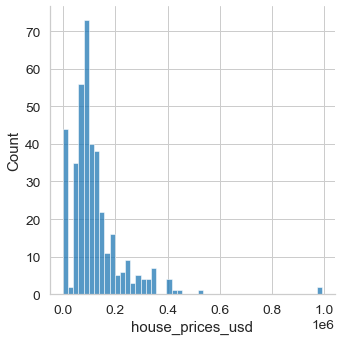

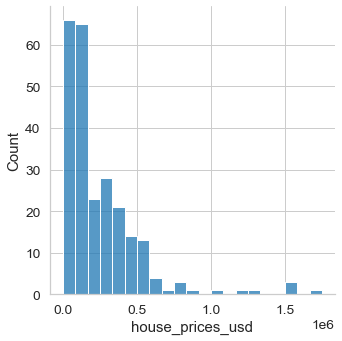

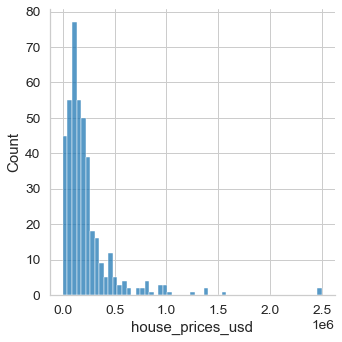

In [329]:
for topic in set(prices_df.dominant_topic):
    df = prices_df[(prices_df.sale_category == 'Sale') & (prices_df.dominant_topic == topic)]
#     print(df)
    sns.displot(df.house_prices_usd)